In [1]:
# pip install matplotlib
# pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn은 matplotlib이 불러진 상태에서만 작동함

In [3]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [4]:
# pip install missingno

In [5]:
import missingno as msno  # 결측치 시각화 라이브러리

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

In [8]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\캐글\\캐글_필사\\타이타닉'

# 1. Dataset 확인

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Survived : 생존여부
# Pclass : 티켓의 클래스
# Sex : 성별
# Age : 나이
# SibSp : 함께 탑승한 형제와 배우자의 수
# Parch : 함께 탑승한 부모, 아이의 수
# Ticket : 티켓 번호
# Fare : 탑승료
# Cabin : 객실 번호
# Embarked : 탑승 항구

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [14]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'\
           .format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [15]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'\
           .format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

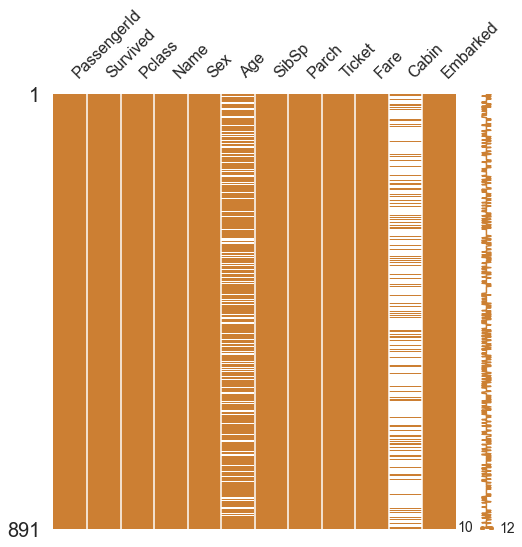

In [16]:
msno.matrix(df = df_train, figsize = (8,8), color = (0.8,0.5,0.2))

<AxesSubplot:>

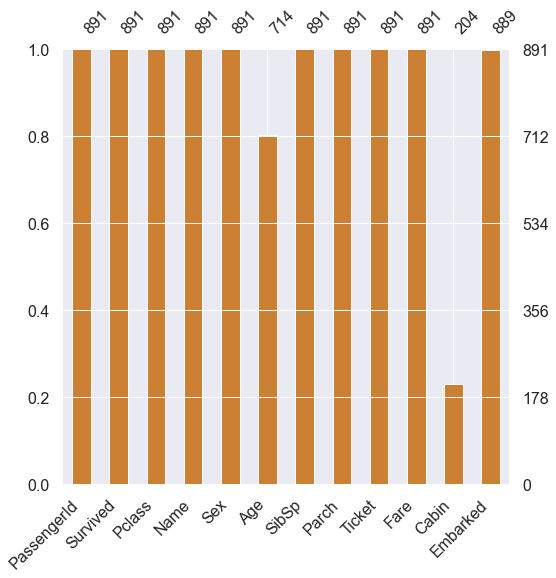

In [17]:
msno.bar(df = df_train, figsize = (8,8), color = (0.8,0.5,0.2))

<AxesSubplot:>

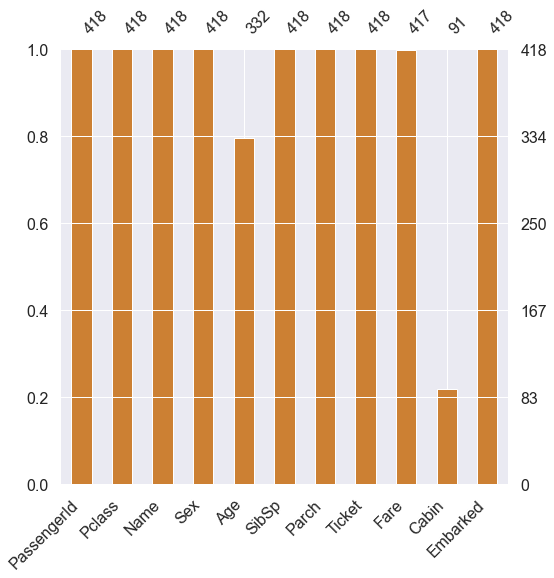

In [18]:
msno.bar(df = df_test, figsize = (8,8), color = (0.8,0.5,0.2))

## 1.2 Target label 확인

In [19]:
# 1. target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
# 2. 지금 같은 binary classification 문제의 경우에서,
#    1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

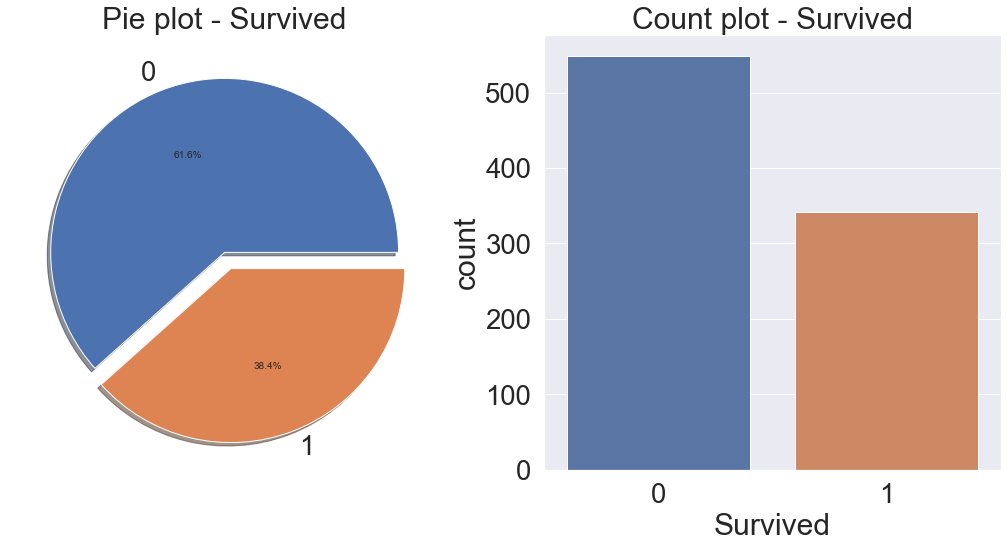

In [20]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

# explode : pie 나누어서 표현 / autopct : 값의 % 표시
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. Exploratory data analysis (EDA)

## 2.1 Pclass

In [21]:
# 등급별 탄 사람 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# # 등급별 생존자 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# , margins=True : ALL 값도 보여줌
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

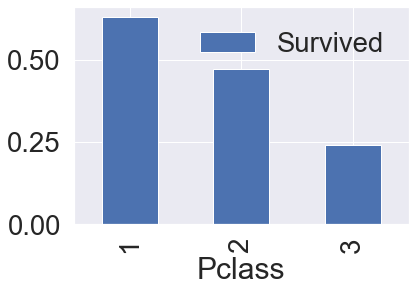

In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

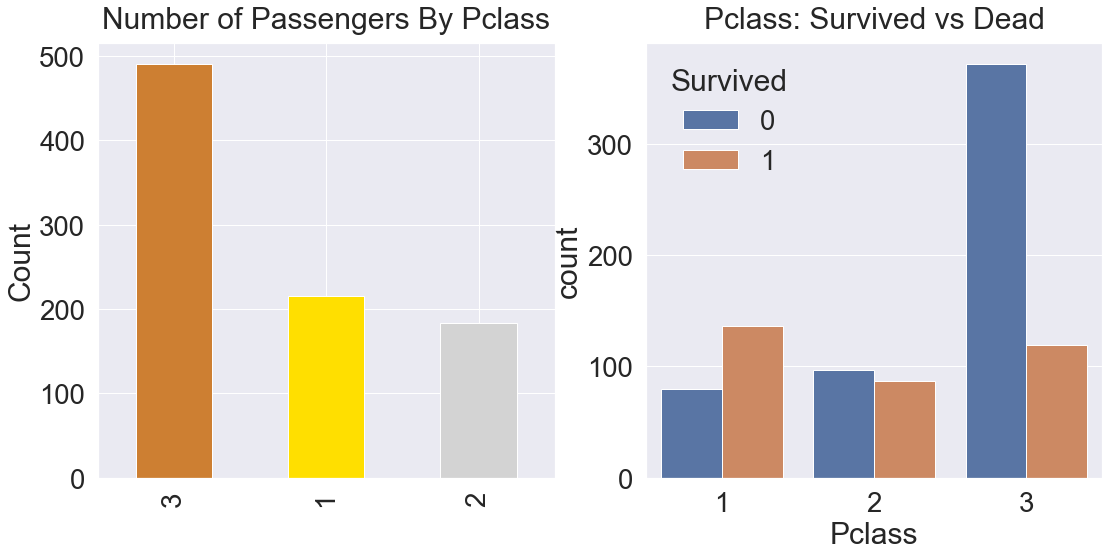

In [38]:
# Pclass별로 value_counts 한 후 bar plot 그리기
y_position = 1.02  # set_title의 글자 위치 정해줌
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')

# Pclass별로 Survived의 countplot을 그리기
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1]) 
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

## 2.2 Sex

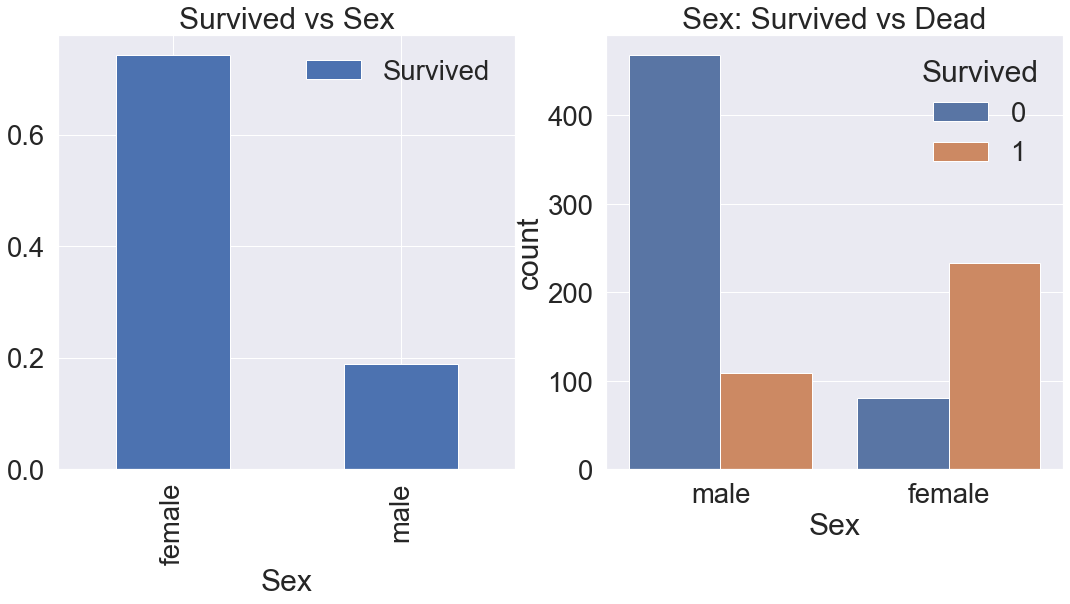

In [42]:
# Sex별로 Survived의 평균을 구해서 bar plot을 그리기
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')  # , y = 1.2 : title 위치

# Sex별로 Survived의 countplot을 그리기
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [45]:
# as_index = False
df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [71]:
# as_index = True
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [48]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)  # margins = True : 합계값(ALL)도 보여줌

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [49]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

In [ ]:
# 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다
# seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

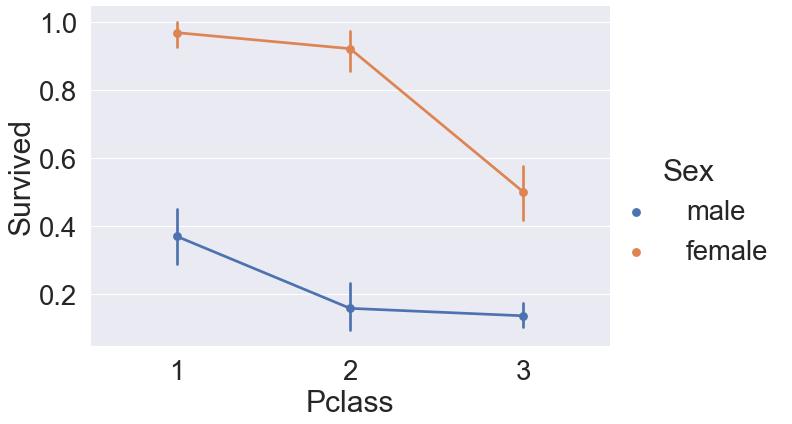

In [60]:
# Pclass별 Survived(확률)의 그래프를 Sex별로 나누어 그리기
# size : 가로세로 크기 키우기 / aspect : 가로 크기 키우기
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

In [ ]:
# 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
# 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.
# 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다

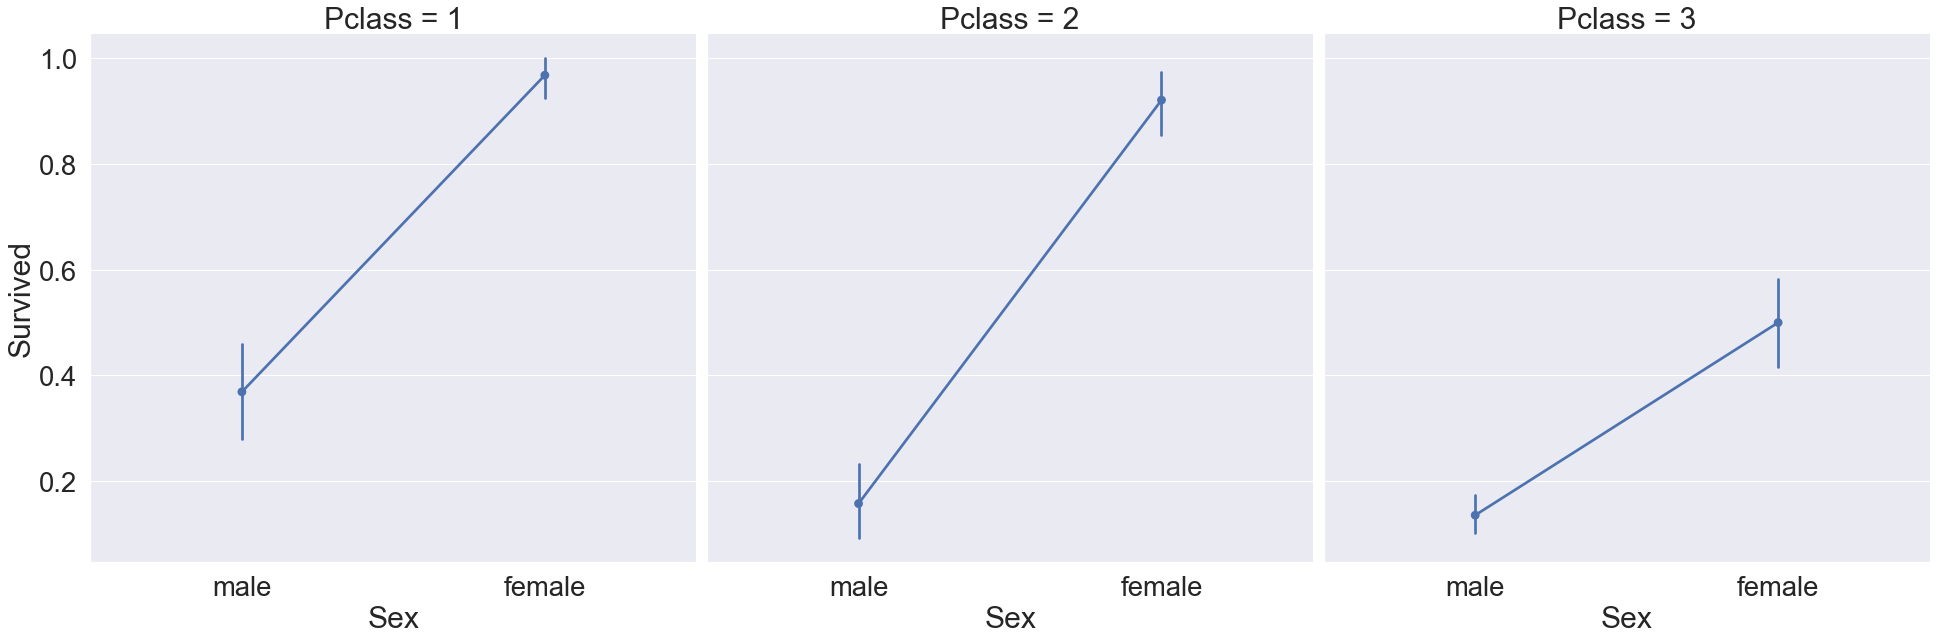

In [67]:
# satureation : ..? 차이없음
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, saturation = 0.5, size = 9, aspect = 1)

## 2.4 Age

In [72]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


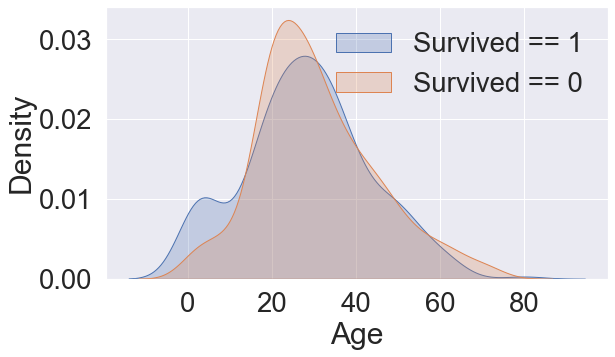

In [81]:
# sns.kdeplot : 밀도(kde) plot
# 밀도 plot에 음영 추가 : shade = True
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax, shade = True)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax, shade = True)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

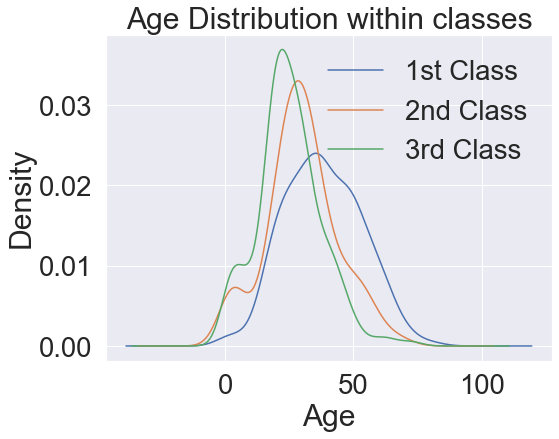

In [93]:
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')  # y = 1.005 : 타이틀의 높낮이 조절
plt.legend(['1st Class','2nd Class','3rd Class'])

# Class가 높을수록 나이 많은 사람의 비중이 커짐

In [ ]:
# 나이대가 변하면서 생존률이 어떻게 되는지 보려고 합니다.
# 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

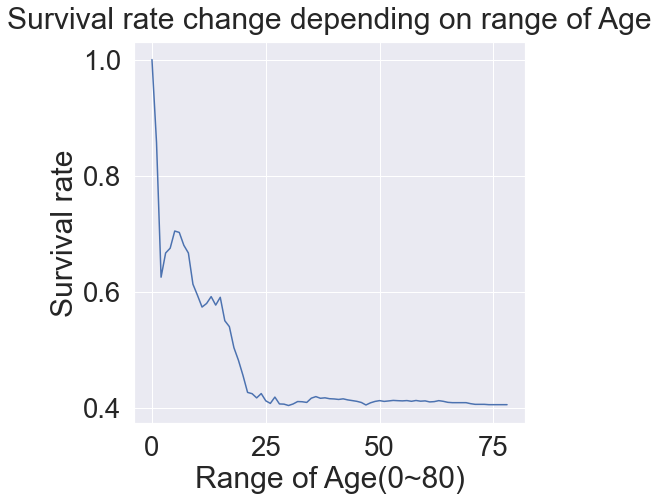

In [101]:
cummulate_survival_ratio = []  # 생존률 집계(cummulate)

for i in range(1,80):
    # 나이 누적범위별 생존률 : cummulate_survival_ratio
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)  # 나이의 범위에 따른 생존율 변화
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~80)')
plt.show()

## 2.5 Pclass, Sex, Age

In [ ]:
# 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
# x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

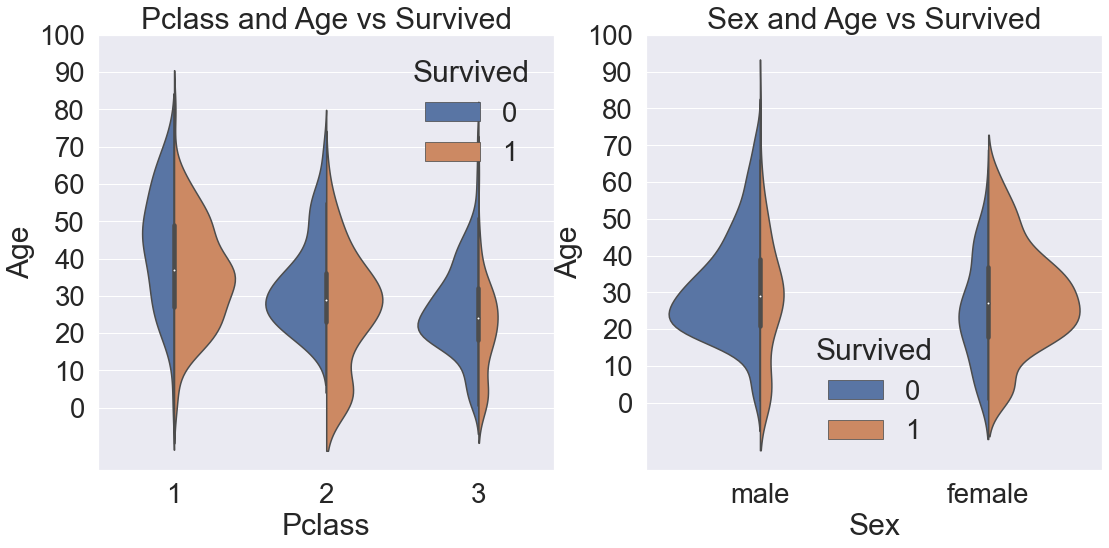

In [119]:
# Pclass와 Age별 생존 분포
f, ax = plt.subplots(1, 2, figsize = (18,8))
# split = True : Pclass별로 바이올린plot을 합치겠다
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

# Sex와 Age별 생존 분포
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 2.6 Embarked

In [ ]:
# Embarked : 탑승한 항구

<AxesSubplot:xlabel='Embarked'>

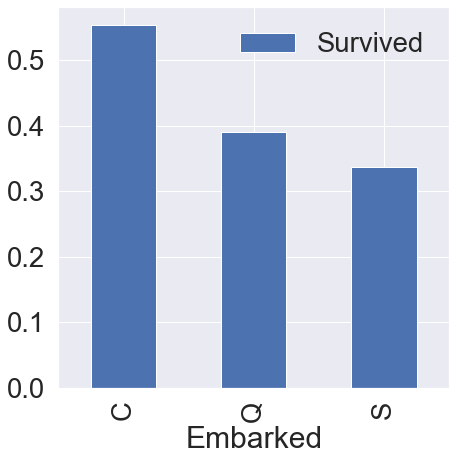

In [124]:
f, ax = plt.subplots(1,1,figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

In [ ]:
# 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.

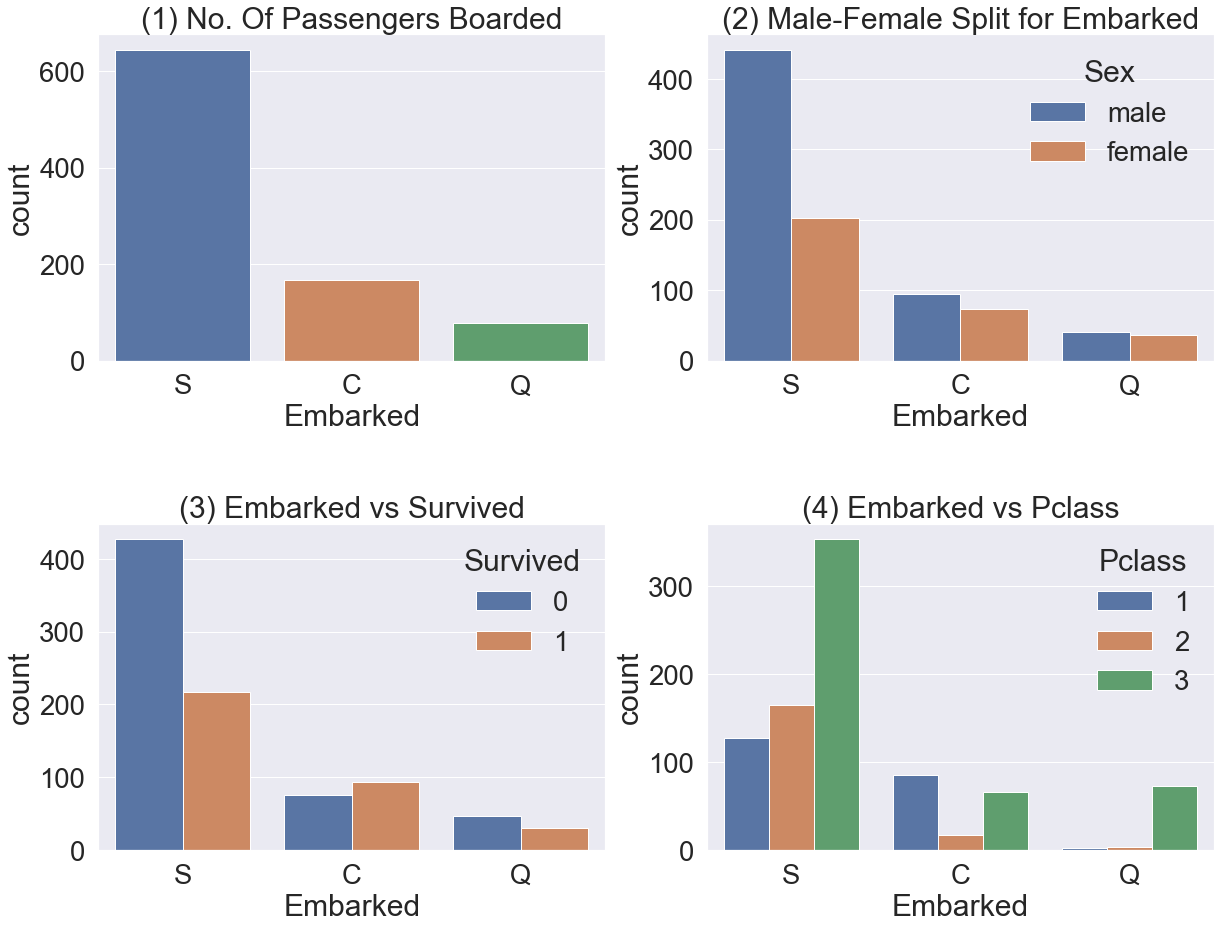

In [129]:
f, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [ ]:
# SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [131]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # 본인을 포함해야해서 1 더함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [133]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


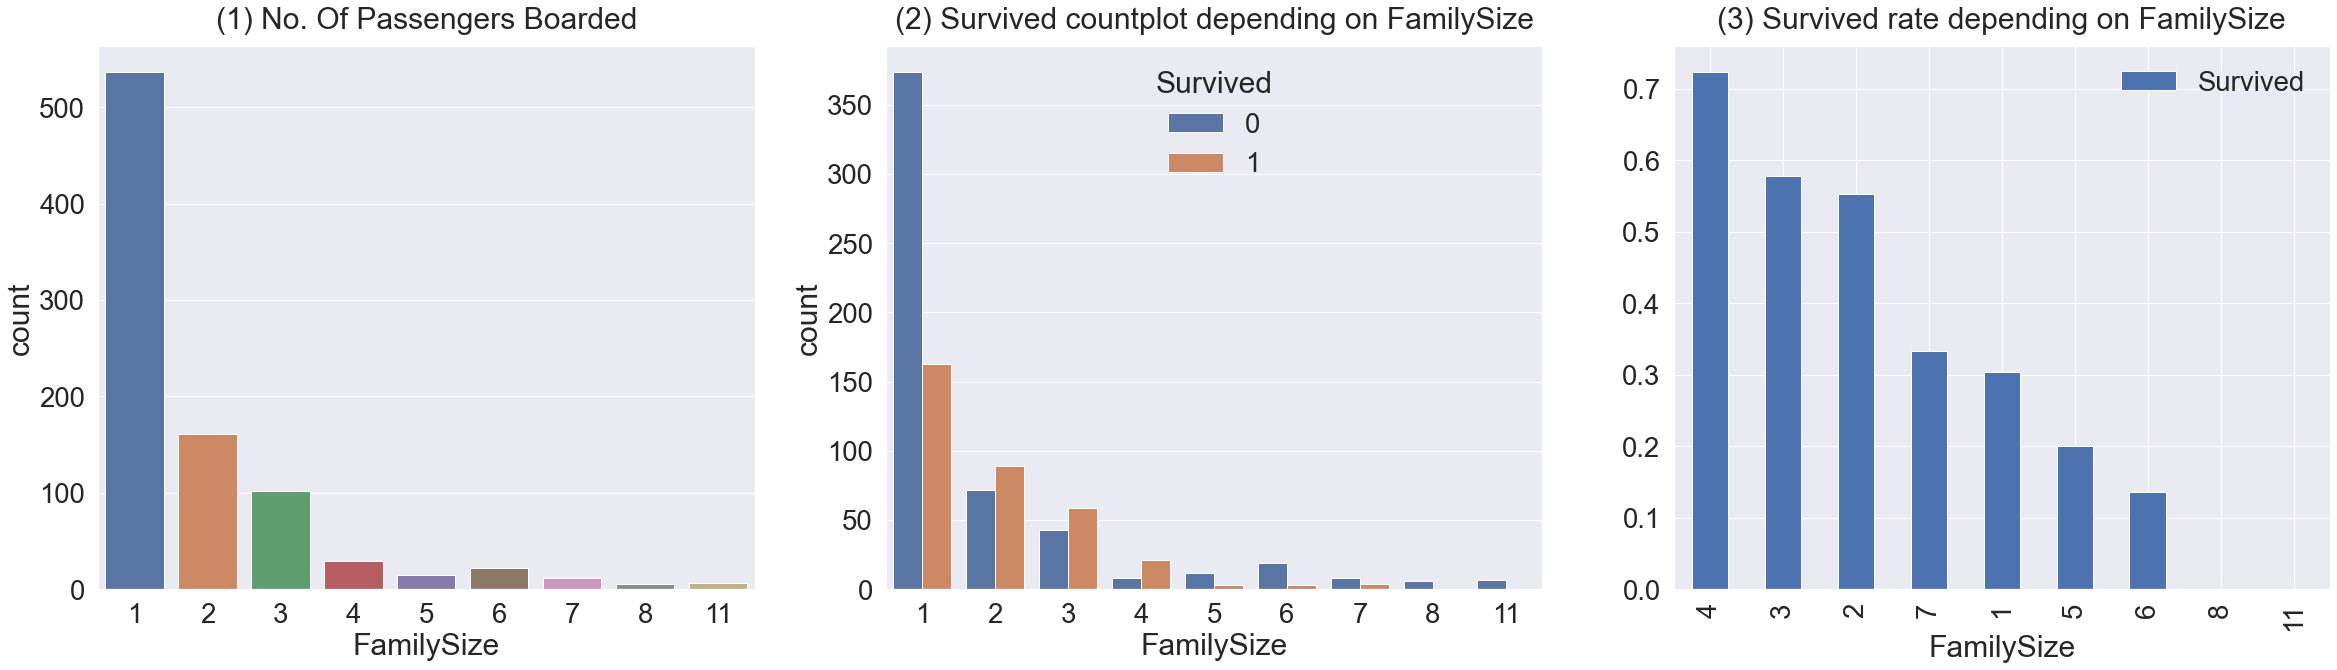

In [147]:
f, ax = plt.subplots(1, 3, figsize = (40,10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

## 2.8 Fare

ValueError: Format specifier missing precision

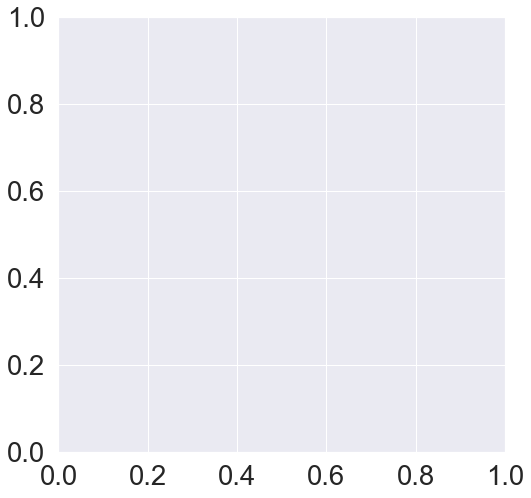

In [153]:
# histogram 그리기
fig, ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:2.f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

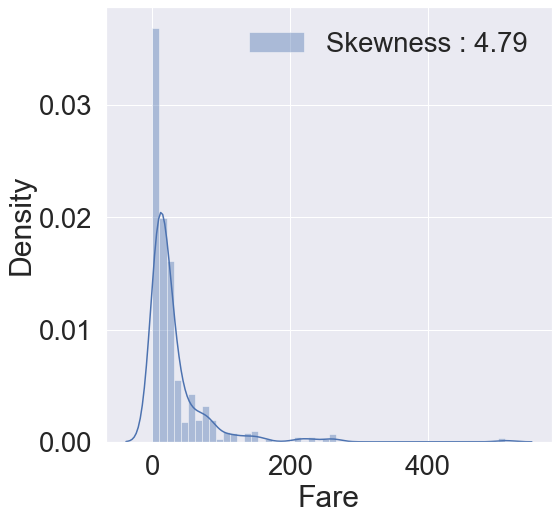

In [163]:
# histogram 그리기
fig, ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [ ]:
# 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness).
# 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다.
# 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
# outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
# dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면
# 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.

In [167]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda x : np.log(x) if x >0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x : np.log(x) if x>0 else 0)

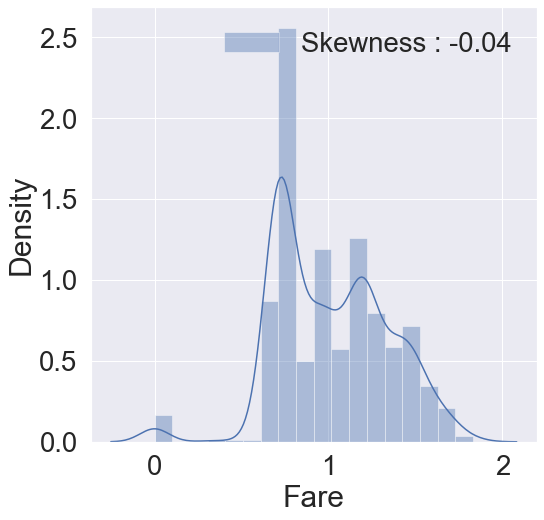

In [170]:
fig, ax = plt.subplots(1,1,figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [ ]:
# log 를 취하니(feature engineering), 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
# 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해
# feature engineering : feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것

## 2.9 Cabin

In [171]:
# Cabin : 객실번호

In [ ]:
# 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
# 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [172]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


## 2.10 Ticket

In [ ]:
# 이 feature 는 NaN 은 없습니다.
# 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데,
# 이를 위해선 사실 아이디어가 필요합니다.
# => ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?

In [173]:
df_train['Ticket'].value_counts()

CA. 2343     7
347082       7
1601         7
CA 2144      6
347088       6
            ..
2223         1
7598         1
2689         1
29103        1
A/5. 3337    1
Name: Ticket, Length: 681, dtype: int64